In [1]:
# DESCRIPTION: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#              to predict the closing stock price of a corporation (S & P 500.) using the past 60 day stock price

In [2]:
import yfinance as yf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr

In [3]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [4]:
sp500.index = pd.to_datetime(sp500.index)

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0.0,0.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0.0,0.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,0.0,0.0


<AxesSubplot: xlabel='Date'>

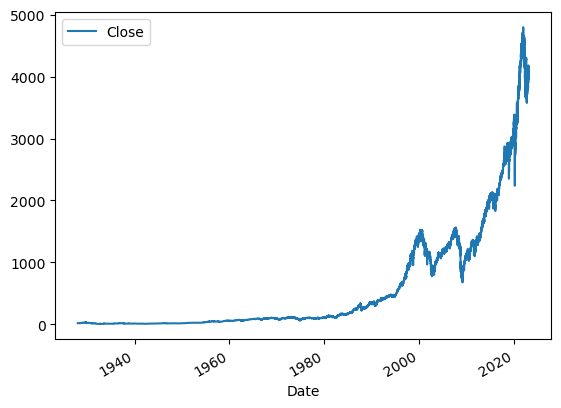

In [6]:
sp500.plot.line(y="Close", use_index=True)


In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)


In [10]:
import pandas as pd

# filter out rows before January 1, 1990
sp500 = sp500.loc[pd.to_datetime('1990-01-01 00:00:00-05:00'):].copy()


In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.34328358208955223

<AxesSubplot: xlabel='Date'>

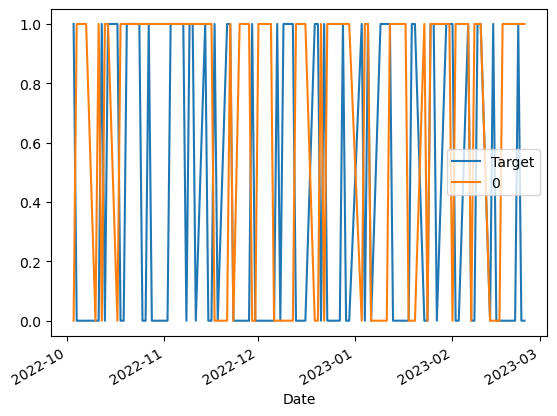

In [14]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [15]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [16]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [17]:
predictions = backtest(sp500, model, predictors)

In [18]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5275397796817626

In [19]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.533664
0    0.466336
Name: Target, dtype: float64

In [20]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]


In [21]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])


In [22]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0,0.998614,0.0,0.990526,2.0,1.023942,27.0,1.012333,111.0,1.109411,535.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0,0.989878,0.0,0.977318,1.0,1.003447,26.0,0.992348,111.0,1.086821,535.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0


In [23]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [24]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [25]:
predictions = backtest(sp500, model, new_predictors)

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0,0.998614,0.0,0.990526,2.0,1.023942,27.0,1.012333,111.0,1.109411,535.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0,0.989878,0.0,0.977318,1.0,1.003447,26.0,0.992348,111.0,1.086821,535.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0


In [27]:
predictions["Predictions"].value_counts()


0.0    4039
1.0     813
Name: Predictions, dtype: int64

In [28]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-02-17 00:00:00-05:00,0,0.0
2023-02-21 00:00:00-05:00,0,0.0
2023-02-22 00:00:00-05:00,1,0.0


In [29]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5694956949569495

In [30]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.543693
0    0.456307
Name: Target, dtype: float64

In [31]:
predictions
df = pd.read_csv('predict.csv')
first_column = df.iloc[:, 1]
target_column = df.iloc[:,2]
predictions_column = df.iloc[:,3]
date_2008 = {}
target_2008 = {}
predictions_2008 = {}
count = 0
c=0
for i in first_column:
    if(str(i).startswith('2008')):
        date_2008[c] = first_column[count]
        target_2008[c] = target_column[count]
        predictions_2008[c] = predictions_column[count]
        c+=1
    count+=1   
df1 = pd.DataFrame.from_dict(date_2008, orient='index', columns=['Value'])
df2 = pd.DataFrame.from_dict(target_2008, orient='index', columns=['Value'])
df3 = pd.DataFrame.from_dict(predictions_2008, orient='index', columns=['Value'])
df = pd.concat([df1, df2, df3],axis=1, ignore_index=True)
df = df.rename(columns={'0': 'Date', '1': 'Target', '2': 'Predictions'})
df.to_csv('predict_2008.csv', index=False)
df



,0,1,2
0,2008-01-02 00:00:00-05:00,0,0.0
1,2008-01-03 00:00:00-05:00,0,1.0
2,2008-01-04 00:00:00-05:00,1,1.0
3,2008-01-07 00:00:00-05:00,0,0.0
4,2008-01-08 00:00:00-05:00,1,1.0
...,...,...,...
248,2008-12-24 00:00:00-05:00,1,0.0
249,2008-12-26 00:00:00-05:00,0,0.0
250,2008-12-29 00:00:00-05:00,1,0.0
251,2008-12-30 00:00:00-05:00,1,0.0


In [32]:

date_2020 = {}
target_2020 = {}
predictions_2020 = {}
count1 = 0
c1=0
for i in first_column:
    if(str(i).startswith('2020')):
        date_2020[c1] = first_column[count1]
        target_2020[c1] = target_column[count1]
        predictions_2020[c1] = predictions_column[count1]
        c1+=1
    count1+=1   
df1_1 = pd.DataFrame.from_dict(date_2020, orient='index', columns=['Value'])
df2_1 = pd.DataFrame.from_dict(target_2020, orient='index', columns=['Value'])
df3_1 = pd.DataFrame.from_dict(predictions_2020, orient='index', columns=['Value'])
df_1 = pd.concat([df1_1, df2_1, df3_1],axis=1, ignore_index=True)
df_1 = df_1.rename(columns={'0': 'Date', '1': 'Target', '2': 'Predictions'})
df_1.to_csv('predict_2020.csv', index=False)
df_1


,0,1,2
0,2020-01-02 00:00:00-05:00,0,0.0
1,2020-01-03 00:00:00-05:00,1,0.0
2,2020-01-06 00:00:00-05:00,0,0.0
3,2020-01-07 00:00:00-05:00,1,0.0
4,2020-01-08 00:00:00-05:00,1,0.0
...,...,...,...
248,2020-12-24 00:00:00-05:00,1,0.0
249,2020-12-28 00:00:00-05:00,0,0.0
250,2020-12-29 00:00:00-05:00,1,0.0
251,2020-12-30 00:00:00-05:00,1,0.0


In [33]:

date_2022 = {}
target_2022 = {}
predictions_2022 = {}
count2 = 0
c2=0
for i in first_column:
    if(str(i).startswith('2022')):
        date_2022[c2] = first_column[count2]
        target_2022[c2] = target_column[count2]
        predictions_2022[c2] = predictions_column[count2]
        c2+=1
    count2+=1   
df1_2 = pd.DataFrame.from_dict(date_2022, orient='index', columns=['Value'])
df2_2 = pd.DataFrame.from_dict(target_2022, orient='index', columns=['Value'])
df3_2 = pd.DataFrame.from_dict(predictions_2022, orient='index', columns=['Value'])
df_2 = pd.concat([df1_2, df2_2, df3_2],axis=1, ignore_index=True)
df_2 = df_2.rename(columns={'0': 'Date', '1': 'Target', '2': 'Predictions'})
df_2.to_csv('predict_2022.csv', index=False)
df_2


,0,1,2
0,2022-01-03 00:00:00-05:00,0,0.0
1,2022-01-04 00:00:00-05:00,0,0.0
2,2022-01-05 00:00:00-05:00,0,0.0
3,2022-01-06 00:00:00-05:00,0,0.0
4,2022-01-07 00:00:00-05:00,0,0.0
...,...,...,...
246,2022-12-23 00:00:00-05:00,0,0.0
247,2022-12-27 00:00:00-05:00,0,0.0
248,2022-12-28 00:00:00-05:00,1,0.0
249,2022-12-29 00:00:00-05:00,0,0.0


In [34]:
import pandas as pd
sp500 = sp500.loc[pd.to_datetime('1990-01-01 00:00:00-05:00'):].copy()


In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0,0.998614,0.0,0.990526,2.0,1.023942,27.0,1.012333,111.0,1.109411,535.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0,0.989878,0.0,0.977318,1.0,1.003447,26.0,0.992348,111.0,1.086821,535.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0


In [36]:
sp500 = sp500.loc[pd.to_datetime('2008-01-01 00:00:00-05:00'):].copy()


In [37]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00-05:00,1467.969971,1471.770020,1442.069946,1447.160034,3452650000,1447.160034,0,0.992729,0.0,0.982066,2.0,0.970801,29.0,0.979438,136.0,1.128452,554.0
2008-01-03 00:00:00-05:00,1447.550049,1456.800049,1443.729980,1447.160034,3429500000,1411.630005,0,1.000000,0.0,0.988843,1.0,0.971947,29.0,0.979338,136.0,1.128165,554.0
2008-01-04 00:00:00-05:00,1444.010010,1444.010010,1411.189941,1411.630005,4166000000,1416.180054,1,0.987572,0.0,0.973162,1.0,0.949716,28.0,0.955297,135.0,1.100225,553.0
2008-01-07 00:00:00-05:00,1414.069946,1423.869995,1403.449951,1416.180054,4221260000,1390.189941,0,1.001609,1.0,0.984759,1.0,0.954343,29.0,0.958366,136.0,1.103527,553.0
2008-01-08 00:00:00-05:00,1415.709961,1430.280029,1388.300049,1390.189941,4705390000,1409.130005,1,0.990739,1.0,0.977311,1.0,0.938559,29.0,0.940840,135.0,1.083064,552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,3997.340088,0,0.998614,0.0,0.990526,2.0,1.023942,27.0,1.012333,111.0,1.109411,535.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0,0.989878,0.0,0.977318,1.0,1.003447,26.0,0.992348,111.0,1.086821,535.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0


In [38]:
sp500 = sp500.loc[pd.to_datetime('2020-01-01 00:00:00-05:00'):].copy()


In [39]:
##sp500

<AxesSubplot: xlabel='Date'>

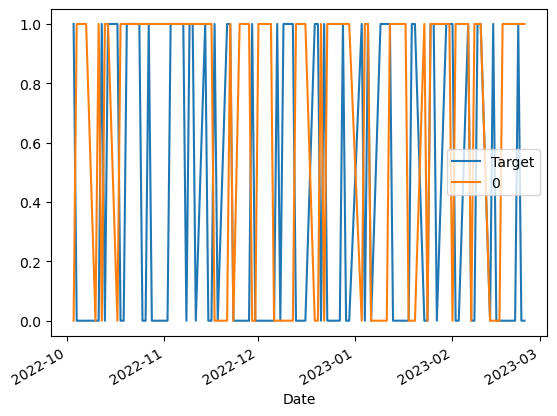

In [40]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [41]:
##sp500 = sp500.loc[pd.to_datetime('1990-01-01 00:00:00-05:00'):].copy()

In [42]:
##sp500

In [43]:
df = pd.read_csv('sp500.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
23897,2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0.0,0.0
23898,2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0.0,0.0
23899,2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,0.0,0.0
23900,2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,0.0,0.0


In [44]:
df = df[['Date', 'Close']]
df = df.dropna()
df

,Date,Close
0,1927-12-30 00:00:00-05:00,17.660000
1,1928-01-03 00:00:00-05:00,17.760000
2,1928-01-04 00:00:00-05:00,17.719999
3,1928-01-05 00:00:00-05:00,17.549999
4,1928-01-06 00:00:00-05:00,17.660000
...,...,...
23897,2023-02-17 00:00:00-05:00,4079.090088
23898,2023-02-21 00:00:00-05:00,3997.340088
23899,2023-02-22 00:00:00-05:00,3991.050049
23900,2023-02-23 00:00:00-05:00,4012.320068


In [45]:
train_data = df[df['Date'] < '2008-01-01']
test_data = df[df['Date'] >= '2008-01-01']
##train_data
test_data


,Date,Close
20088,2008-01-02 00:00:00-05:00,1447.160034
20089,2008-01-03 00:00:00-05:00,1447.160034
20090,2008-01-04 00:00:00-05:00,1411.630005
20091,2008-01-07 00:00:00-05:00,1416.180054
20092,2008-01-08 00:00:00-05:00,1390.189941
...,...,...
23897,2023-02-17 00:00:00-05:00,4079.090088
23898,2023-02-21 00:00:00-05:00,3997.340088
23899,2023-02-22 00:00:00-05:00,3991.050049
23900,2023-02-23 00:00:00-05:00,4012.320068


In [47]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = train_data['Close'].values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr


X_train1 = np.array(test_data.index).reshape(-1, 1)
y_train1 = test_data['Close'].values.reshape(-1, 1)
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
lr1


LinearRegression()

In [48]:
train_score = lr.score(X_train, y_train)
print("Training R-squared:", train_score)

Training R-squared: 0.5878223622059473


In [49]:
test_score = lr.score(X_train1, y_train1)
print("Testing R-squared:", test_score)

Testing R-squared: -1.6065443440038525
